In [1]:
import pandas as pd
import seaborn as sns

In [18]:
df = pd.read_excel('precos_porto_seguro.xlsx')

In [19]:
df.head()

,marca,marca_ID,modelo,modelo_descricao,categoria,categoria_ID,periodo_contrato_anos,pacote_km,km_por_ano,preco,preco_km
0,VW,1,VIRTUS,HIGHLINE INFODISPLAY 1.0 TURBO,sedan,1,2.0,24000,12000,3119,0.259917
1,VW,1,VIRTUS,HIGHLINE INFODISPLAY 1.0 TURBO,sedan,1,2.0,36000,18000,3189,0.177167
2,VW,1,VIRTUS,HIGHLINE INFODISPLAY 1.0 TURBO,sedan,1,2.0,48000,24000,3269,0.136208
3,VW,1,VIRTUS,HIGHLINE INFODISPLAY 1.0 TURBO,sedan,1,2.0,60000,30000,3359,0.111967
4,VW,1,VIRTUS,HIGHLINE INFODISPLAY 1.0 TURBO,sedan,1,1.5,18000,12000,3219,0.268250


In [20]:
df = df.drop(['modelo', 'modelo_descricao', 'categoria_ID','marca_ID'], axis=1)

In [21]:
df.head()

,marca,categoria,periodo_contrato_anos,pacote_km,km_por_ano,preco,preco_km
0,VW,sedan,2.0,24000,12000,3119,0.259917
1,VW,sedan,2.0,36000,18000,3189,0.177167
2,VW,sedan,2.0,48000,24000,3269,0.136208
3,VW,sedan,2.0,60000,30000,3359,0.111967
4,VW,sedan,1.5,18000,12000,3219,0.268250


In [23]:
df = pd.get_dummies(df)

In [25]:
df.head()

,periodo_contrato_anos,pacote_km,km_por_ano,preco,preco_km,marca_CAOA-CHERY,marca_CHEVROLET,marca_HYUNDAI,marca_JEEP,marca_NISSAN,marca_RENAULT,marca_TOYOTA,marca_VW,categoria_compacto,categoria_premium,categoria_sedan,categoria_suv
0,2.0,24000,12000,3119,0.259917,0,0,0,0,0,0,0,1,0,0,1,0
1,2.0,36000,18000,3189,0.177167,0,0,0,0,0,0,0,1,0,0,1,0
2,2.0,48000,24000,3269,0.136208,0,0,0,0,0,0,0,1,0,0,1,0
3,2.0,60000,30000,3359,0.111967,0,0,0,0,0,0,0,1,0,0,1,0
4,1.5,18000,12000,3219,0.268250,0,0,0,0,0,0,0,1,0,0,1,0


In [30]:
dmarca = df.loc[:,'preco_km':'marca_VW']

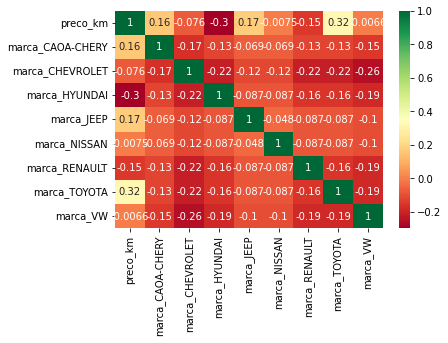

In [31]:
ax = sns.heatmap(dmarca.corr(),annot=True,cmap='RdYlGn')

In [33]:
dcategoria = df.loc[:,:'preco_km','categoria_compacto':'categoria_sedan']

SyntaxError: invalid syntax (2083831440.py, line 1)

In [26]:
ax = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

TypeError: cannot do positional indexing on Index with these indexers [preco_km] of type str

c:\Users\rozam\Documents\ABLA\projetos\predicao_preco_locacao\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='preco', ylabel='Density'>

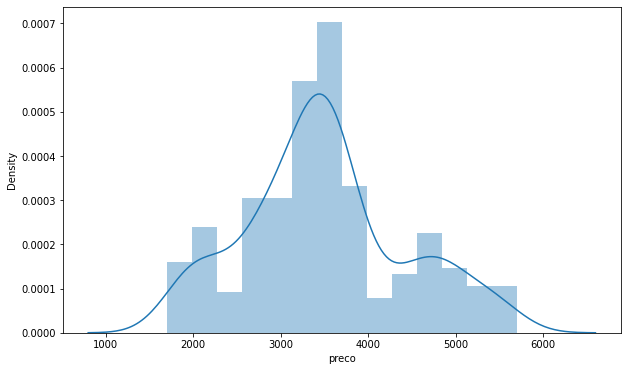

In [27]:
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df['preco'])

c:\Users\rozam\Documents\ABLA\projetos\predicao_preco_locacao\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='preco_km', ylabel='Density'>

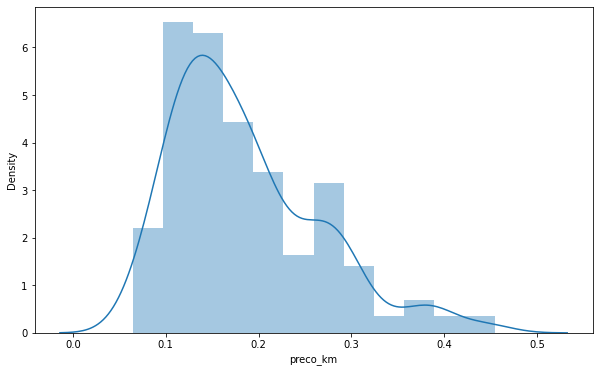

In [34]:
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df['preco_km'])

In [28]:
X = pd.get_dummies(df.drop('preco',axis=1),drop_first=True)
y = df['preco']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)